In [23]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [2]:

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

C:\Users\Wojtek\AppData\Roaming\Python\Python38\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


In [4]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [32]:
#Model implementation

class Network(nn.Module):
    
    # Defining the layers, 128, 64, 10 units each
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16,16)
        self.fc4 = nn.Linear(16, 10)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        #x = F.softmax(x, dim=1)
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=10, bias=True)
)

In [10]:
#Checking images
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()


#Resizing images shapes
images.resize_(images.shape[0], 1, 784)
images.shape

img_idx = 0
images[img_idx,:].shape
# Forward pass through the network
img_idx = 0
ps = model(images[img_idx,:])
ps


tensor([[-0.2701, -0.0843,  0.2595,  0.1624,  0.2761,  0.1488, -0.0592, -0.2045,
          0.2229,  0.1472]], grad_fn=<AddmmBackward>)

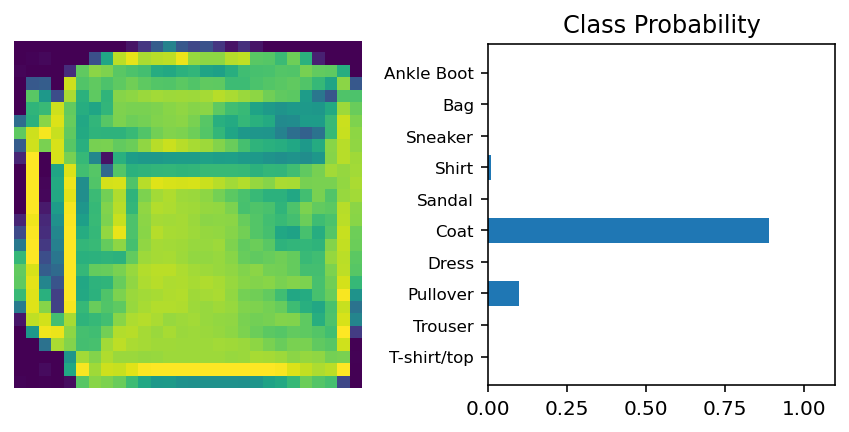

In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
img = images[img_idx]
view_classify(img, ps, version='Fashion')

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [35]:
#train the model

epochs = 3
print_every = 40

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model(images)           # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

Epoch: 1/3
	Iteration: 0	 Loss: 0.0576
	Iteration: 40	 Loss: 2.0411
	Iteration: 80	 Loss: 1.3809
	Iteration: 120	 Loss: 0.9142
	Iteration: 160	 Loss: 0.7179
	Iteration: 200	 Loss: 0.6194
	Iteration: 240	 Loss: 0.5988
	Iteration: 280	 Loss: 0.6121
	Iteration: 320	 Loss: 0.5824
	Iteration: 360	 Loss: 0.5492
	Iteration: 400	 Loss: 0.5532
	Iteration: 440	 Loss: 0.5586
	Iteration: 480	 Loss: 0.5451
	Iteration: 520	 Loss: 0.5401
	Iteration: 560	 Loss: 0.5354
	Iteration: 600	 Loss: 0.5250
	Iteration: 640	 Loss: 0.5162
	Iteration: 680	 Loss: 0.5023
	Iteration: 720	 Loss: 0.5336
	Iteration: 760	 Loss: 0.5228
	Iteration: 800	 Loss: 0.5052
	Iteration: 840	 Loss: 0.4824
	Iteration: 880	 Loss: 0.4825
	Iteration: 920	 Loss: 0.4761
Epoch: 2/3
	Iteration: 0	 Loss: 0.0137
	Iteration: 40	 Loss: 0.4741
	Iteration: 80	 Loss: 0.4740
	Iteration: 120	 Loss: 0.4842
	Iteration: 160	 Loss: 0.4699
	Iteration: 200	 Loss: 0.4544
	Iteration: 240	 Loss: 0.4736
	Iteration: 280	 Loss: 0.4524
	Iteration: 320	 Loss: 0.4

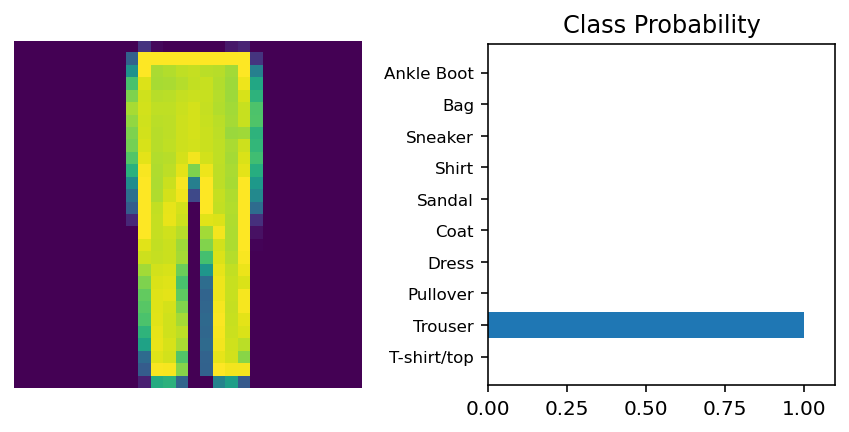

In [28]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img, ps, version='Fashion')